- Time series data is a form of data with values measured at different points in time.
- Some time series data is distributed according to a certain frequency, for example, weather in 1 hour, website 
traffic during the day, total revenue in the month... Time series data can also be distributed with intervals. 
irregularly, for example the number of emergency calls during the day or system logs

In this section, we will explore the aspect of data organization and visualization for time series.
-  Rolling windows
Specifically with time series data for energy, we will become familiar with the application of time-based indexing, 
resampling, and rolling techniques. This will help us analyze important aspects of hidden information in the data. 
For example, Rolling windows can help us explore variations in electricity demand and renewable energy supply 
over time. We use the daily time series data set of Open Power System Data (OPSD) in Germany, including total 
electricity consumption, wind power production and solar power production nationwide in the period 2006-2017. 


We will do the following:
-  Import libraries and read dataset
- Time-based indexing
- Visualizing time series data
-  Seasonality
- Resampling
- Rolling windows
- Trends

We will explore how electricity consumption and production in Germany change over time, and:
- When is electricity consumption typically highest and lowest?
- How has wind and solar energy production changed seasonally?
- What are the long-term trends in electricity, solar and wind energy consumption?
- Compare the ratio of wind and solar energy output to wind and solar energy consumption, and how has this ratio changed over time?

# 1. Import libraries and read dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset_path = "./data/opsd_germany_daily.csv"

In [4]:
# Read data from .csv file
opsd_daily = pd.read_csv(dataset_path)

In [5]:
opsd_daily.shape

(4383, 5)

In [6]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [7]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


For the Time Series data format, we can choose the Date column as the index (because the value of this 
column in the data set is always unique)

In [8]:
opsd_daily = opsd_daily.set_index("Date")
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


We can repeat the step of loading the file and this time, specify the column that will be the index right from the start show the function call, and also create additional Year, Month, Weekday column numbers extracted from the Date column Convenient for handling some steps later:


In [9]:
dataset_path = "./data/opsd_germany_daily.csv"

In [10]:
opsd_daily = pd.read_csv(dataset_path, index_col = 0)

In [11]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN



parse_dates=True: This option tells Pandas to automatically parse columns containing dates and convert them to datetime data types. Without this option, date columns may be read as strings, and conversion to datetime will need to be done manually later.

In [12]:
# Add columns with year , month , and weekday name

# Make sure the index is of type datetime
opsd_daily.index = pd.to_datetime(opsd_daily.index)

opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday Name"] = opsd_daily.index.day_name()

In [13]:
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


# 2. Time-based indexing:

One of the standout features of pandas when dealing with time
series data is time-based indexing, which involves using dates and times to organize and access
data (quite similar to Indexing in the previous section, but the values ​​will be dates and years).
This allows us to use loc accessors to execute. For example, we can access data according to a
time period from 2014-01-20 to 2014-01-22: and retrieve

In [14]:
opsd_daily.loc["2014-01-20":"2014-01-25"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday
2014-01-23,1631.373,125.177,13.661,138.838,2014,1,Thursday
2014-01-24,1617.411,106.527,9.807,116.334,2014,1,Friday
2014-01-25,1399.124,145.786,19.051,164.837,2014,1,Saturday


Another feature of pandas is partial-string indexing, which allows us to Slicing according to temporal descriptions
time in general, no need to specify date, month, year as in the above section. For example:

In [15]:
opsd_daily.loc["2014-01"].head(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-01,1080.080,220.085,30.493,250.578,2014,1,Wednesday
2014-01-02,1343.101,304.166,13.680,317.846,2014,1,Thursday
2014-01-03,1379.776,340.639,23.510,364.149,2014,1,Friday
2014-01-04,1271.029,260.828,15.227,276.055,2014,1,Saturday
2014-01-05,1182.416,175.812,18.067,193.879,2014,1,Sunday


# 3. Visualizing time series data:

With pandas supporting data visualization on graphs, combined with the seaborn library, we can easily visualize time-series data on graphs. For example, we visualize (plot) the Consumption column data as follows:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
%matplotlib inline
sns.set_theme()

In [18]:
# Display figures inline in Jupyter notebook
# Use seaborn style defaults and set the default figure size
sns.set(rc = {"figure.figsize":(11,4)})

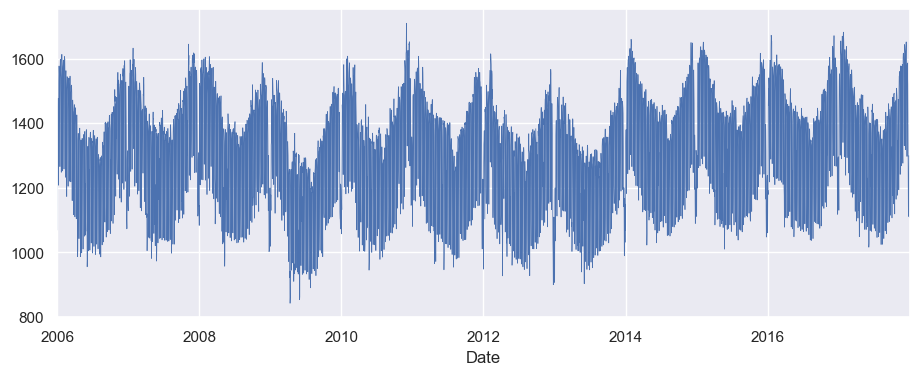

In [19]:
opsd_daily["Consumption"].plot(linewidth =0.5);

We can plot several other data columns into individual graphs at the same time:

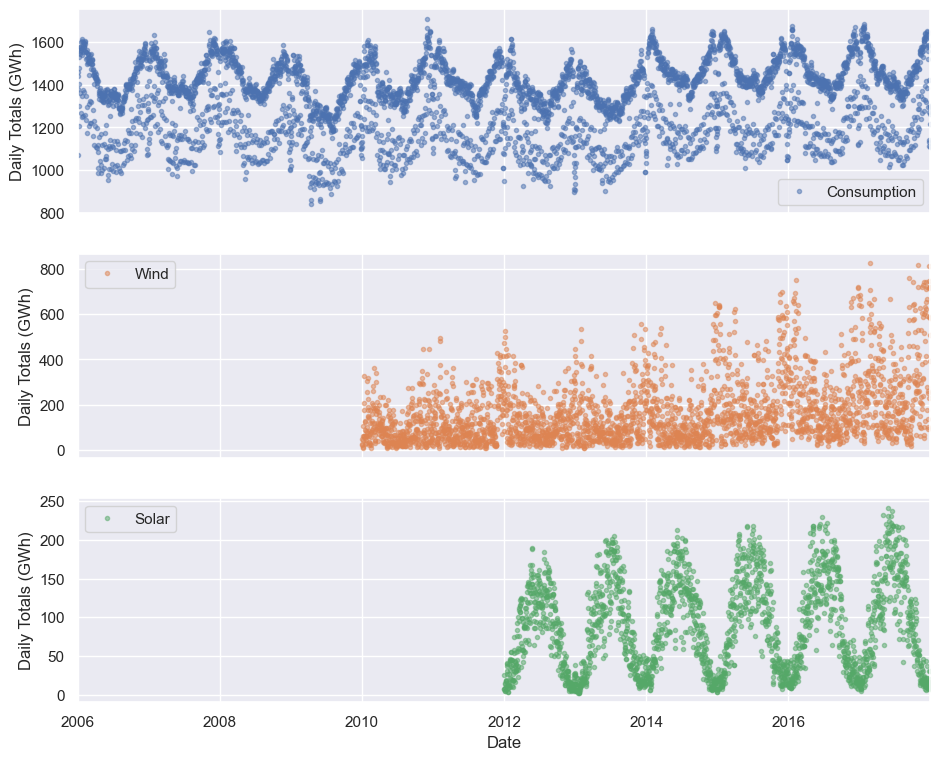

In [20]:
import matplotlib.pyplot as plt

cols_plot = ["Consumption", "Wind", "Solar"]
axes = opsd_daily[cols_plot].plot(marker = ".", alpha =0.5 , linestyle = "None", figsize =(11 , 9) , subplots = True)
for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")
plt.show()

# 4.Seasonality:


Translation: seasonality. An index of characteristics that repeat over a fixed period of time throughout the years. These types of characteristics are often influenced by many different factors. In the data of the article, we can exploit the seasonality of the data, use seaborn to draw, and group the data into groups as follows:

In [21]:
palette = sns.color_palette("husl", 12)  # 12 different colors for 12 months

C:\Users\Admin\AppData\Local\Temp\ipykernel_9336\1731621763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = opsd_daily, x = "Month", y = name, ax = ax, palette = palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9336\1731621763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = opsd_daily, x = "Month", y = name, ax = ax, palette = palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9336\1731621763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = opsd_daily, x = "Month", y = name, ax = ax, palette = palette)


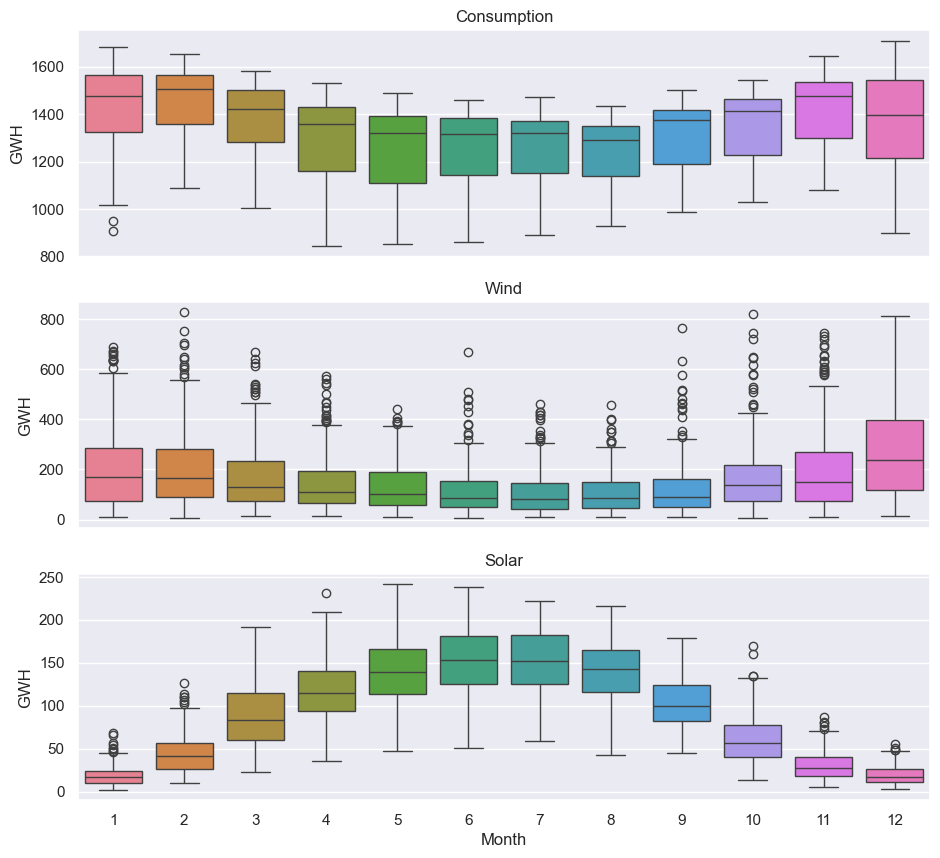

In [22]:
fig, axes = plt.subplots(3,1,figsize = (11,10), sharex = True)
for name, ax in zip(["Consumption", "Wind", "Solar"], axes):
    sns.boxplot(data = opsd_daily, x = "Month", y = name, ax = ax, palette = palette)
    ax.set_ylabel("GWH")
    ax.set_title(name)

    # Remove the automatic x- axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel("")

# 5. Frequencies:

In pandas' DatetimeIndex, we can use available time values to form a series of frequency 
values. For example, with two values '1998-03-10' and '1998-03-14', we can create a list of times with 
frequency in days. That means our new list becomes: '1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13', 
'1998-03-14'. This is done by setting the 'freq' property.

In [23]:
pd.date_range("1998-03-10", "1998-03-15", freq = "D")

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

With this feature of pandas, we can replace lost data using the forward fill (fill) technique. This technique 
involves using a value recorded at a previous time as a substitute for all the value lost later before 
encountering a valuable data sample. For example, suppose we know the Consumption value of a few 
days as follows:

In [24]:
# To select an arbitrary sequence of date / time values from a pandas time series ,
# we need to use a DatetimeIndex , rather than simply a list of date / time strings
times_sample = pd.to_datetime(["2013-02-03","2013-02-06","2013-02-08"])
# Select the specified dates and just the Consumption column

In [25]:
consum_sample = opsd_daily.loc[times_sample, ["Consumption"]]

In [26]:
consum_sample 

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [27]:
# Convert the data to daily frequency , without filling any missings
consum_freq = consum_sample.asfreq ("D")
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [28]:
# Create a column with missings forward filled
consum_freq["Consumption - Forward Fill"] = consum_sample.asfreq("D", method = "ffill")

In [29]:
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [30]:
# Linear Interpolation
consum_freq["Consumption - Interpolated"] = consum_freq["Consumption"].interpolate(method = "linear")
consum_freq

,Consumption,Consumption - Forward Fill,Consumption - Interpolated
2013-02-03,1109.639,1109.639,1109.639000
2013-02-04,NaN,1109.639,1223.575667
2013-02-05,NaN,1109.639,1337.512333
2013-02-06,1451.449,1451.449,1451.449000
2013-02-07,NaN,1451.449,1442.273500
2013-02-08,1433.098,1433.098,1433.098000


Time-based Interpolation (time):
This method interpolates based on time intervals (absolute time) rather than indices. It’s especially useful for uneven time series data where the gaps between data points vary.

- Advantages: Effective for uneven time series data.
- Limitations: Requires the index to be a DatetimeIndex.

In [31]:
consum_freq["Consumption - Time Interpolated"] = consum_freq["Consumption"].interpolate(method="time")
consum_freq

,Consumption,Consumption - Forward Fill,Consumption - Interpolated,Consumption - Time Interpolated
2013-02-03,1109.639,1109.639,1109.639000,1109.639000
2013-02-04,NaN,1109.639,1223.575667,1223.575667
2013-02-05,NaN,1109.639,1337.512333,1337.512333
2013-02-06,1451.449,1451.449,1451.449000,1451.449000
2013-02-07,NaN,1451.449,1442.273500,1442.273500
2013-02-08,1433.098,1433.098,1433.098000,1433.098000


2. Cubic Interpolation (cubic):

Cubic interpolation is smoother than linear interpolation. It uses cubic polynomials to calculate the missing values, making it suitable for non-linear time series trends.

- Advantages: Smoother than linear interpolation.
- Limitations: Not effective if there are many consecutive missing values.

In [32]:
consum_freq["Consumption - Cubic Interpolated"] = consum_freq["Consumption"].interpolate(method="cubic")
consum_freq

ValueError: The number of derivatives at boundaries does not match: expected 1, got 0+0

3. Spline Interpolation (spline):
- Spline interpolation can be customized with different polynomial degrees (commonly degree 2 or 3). This method creates smooth curves between data points, reducing errors if the data trend is more complex than linear.

- Advantages: Creates smooth curves between data points.
- Limitations: Care is needed when choosing the polynomial degree (order), as a high degree can lead to overfitting the data.

In [33]:
consum_freq["Consumption - Spline Interpolated"] = consum_freq["Consumption"].interpolate(method="spline", order=2)
consum_freq

,Consumption,Consumption - Forward Fill,Consumption - Interpolated,Consumption - Time Interpolated,Consumption - Spline Interpolated
2013-02-03,1109.639,1109.639,1109.639000,1109.639000,1109.639000
2013-02-04,NaN,1109.639,1223.575667,1223.575667,1272.820533
2013-02-05,NaN,1109.639,1337.512333,1337.512333,1386.757200
2013-02-06,1451.449,1451.449,1451.449000,1451.449000,1451.449000
2013-02-07,NaN,1451.449,1442.273500,1442.273500,1466.895933
2013-02-08,1433.098,1433.098,1433.098000,1433.098000,1433.098000


5. Rolling Mean (rolling mean):

Rolling mean helps smooth out random fluctuations and minimize errors when filling missing values. You can apply rolling mean before filling the missing values.

- Advantages: Reduces random fluctuations.
- Limitations: May not accurately reflect real trends if the data has strong patterns.

In [34]:
consum_freq["Consumption - Rolling Mean"] = consum_freq["Consumption"].fillna(consum_freq["Consumption"].rolling(window=3, min_periods=1).mean())

Choosing the Right Method:
- If the data has a linear trend: Use linear interpolation or ffill, bfill methods.
- If the data has non-linear or complex trends: Use cubic interpolation, spline, or machine learning models.
- If the data has lag or cyclical patterns: Use rolling mean or forward fill.

# 6. Resampling:

: A technique used to change the representation frequency of a time series data set, which can 
increase or decrease the sampling frequency. For example, we can reduce the frequency of the current data 
set from days to months. This means our new dataset will have fewer data samples than the original.

Resampling is often useful with time series for lower or higher frequencies. Resampling for lower frequency 
(downsampling) often involves aggregation operations, for example monthly sales levels from daily data. 
Resampling for higher grequency (upsampling) is less common. Here, we try to apply downsampling to the 
current data set as commonly used in interpolation.


In [35]:
# Specify the data columns we want to include (i.e. exclude Year , Month , Weekday Name )
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency , aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample("W").mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In the code above, we downsampling from daily to weekly frequency. The value of the columns will now be 
the average of the 7 days of the week

Of course, when we downsample the dataset, the number of data samples of the new data table will be less than the original table and 1/7 times less. This can be checked by using the shape attribute of the DataFrame:

In [36]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


 We visualize Solar's daily and weekly time series for 6 months as follows:

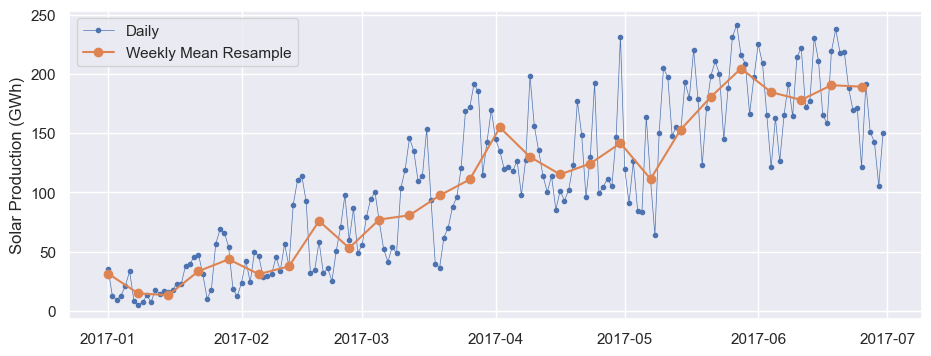

In [37]:
# Start and end of the date range to extract
start, end = "2017-01", "2017-06"
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, "Solar"], marker = ".", linestyle = "-", linewidth =0.5, label = "Daily")
ax.plot(opsd_weekly_mean.loc[start:end, "Solar"], marker = "o", linestyle = "-", label = "Weekly Mean Resample")
ax.set_ylabel("Solar Production (GWh)")
ax.legend()
plt.show()

Note that our original data table has some null values. So to ensure that all
the samples have values, we set the min_count parameter to handle this problem. For example, we resampling
the data set by year, to ensure that all days in the year have non-null values, we can
set min_count=360 (you can choose min_count with a different value depending on
your personal observations):

In [38]:
# Compute the annual sums , setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample ("Y").sum(min_count=360)

Purpose: Sum values ​​by year.
resample("Y"): Resample data by year ("Y" represents the annual frequency).
sum(min_count=360): Sum values ​​in each year. If a year has less than 360 days of data (meaning more than 5 days of missing data), the result for that year will be NaN instead of a total.
data_columns: This is a list or index that identifies the columns in the DataFrame that you want to sum.

In [39]:
# The default index of the resampled DataFrame is the last day of each year ,
# ( ’2006 -12 -31 ’ , ’2007 -12 -31 ’ , etc .) so to make life easier , set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = "Year"
# Compute the ratio of Wind + Solar to Consumption
opsd_annual["Wind + Solar/ Consumption"] = opsd_annual["Wind+Solar"] / opsd_annual["Consumption"]
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind + Solar/ Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


We can plot a graph showing the contribution of wind and solar energy production to electricity consumption since 2012 as follows:

Text(0.5, 1.0, 'Win + Solar share in annual Electricity consumption')

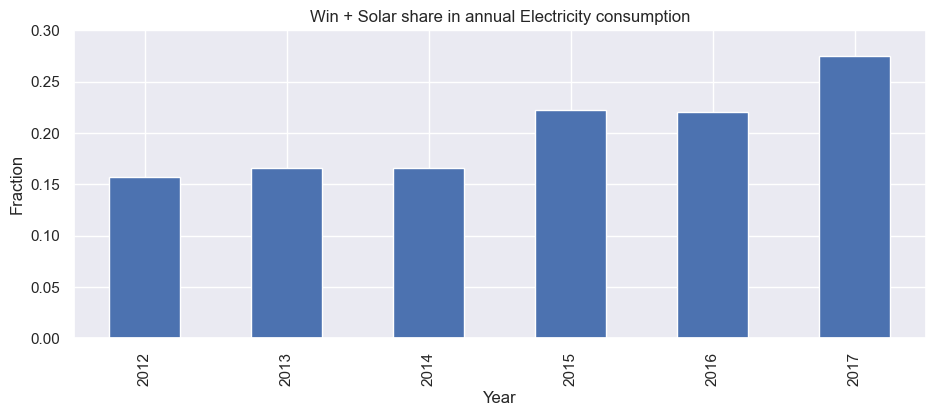

In [40]:
# Plot from 2022 onwards, because there is no solar production data in earlier year
ax = opsd_annual.loc[2012:, "Wind + Solar/ Consumption"].plot.bar()
ax.set_ylabel("Fraction")
ax.set_ylim(0,0.3)
ax.set_title("Win + Solar share in annual Electricity consumption")

# 7. Rolling windows:


Rolling windows are also an important information transfer operation in time series data. Like downsampling, rolling windows divide the data into time windows (time
intervals such as weeks, months, etc. are slid over daily data samples) and the data in
each window is aggregated with the function mean(), median(), sum(), etc. However, unlike downsampling, where the data do not overlap and the output always has a lower frequency than the input, rolling
windows overlap and aggregate data with the same frequency, so the converted time series has the same frequency as the original time series. For example, with rolling for 7 days:

In [43]:
# Compute Centered 7 - day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center = True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


Here, 2006-01-01 to 2006-01-07 is labeled as 2006-01-04, 2006-01-02 to 2006-01-08 is labeled as 2006-01-05, and so on for the other lines.

# 8. Trend

Trends: A characteristic that indicates the trend of data, which can increase or decrease over a long period of time. With the rolling windows technique, we can easily visualize the trends of the data set, at different time scales. For example, we calculate the 365-day rolling mean:

In [44]:
import matplotlib.dates as mdates

# The min_periods =360 argument accounts for a few isolated missing days in the wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window = 365, center = True, min_periods = 360).mean()

In [46]:
opsd_365d["2016-01"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_9336\2849966536.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  opsd_365d["2016-01"]


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2016-01-01,1382.181496,224.271027,93.116625,317.387652
2016-01-02,1381.453627,224.806734,92.886110,317.692844
2016-01-03,1381.039630,225.085940,92.790301,317.876241
2016-01-04,1381.736718,224.971756,92.814770,317.786526
2016-01-05,1381.722405,225.420458,92.747827,318.168285
2016-01-06,1381.608995,226.269940,92.741479,319.011419
2016-01-07,1381.515025,225.431827,92.989529,318.421356
2016-01-08,1381.454271,224.914940,93.080381,317.995321
2016-01-09,1380.870449,224.872419,93.024600,317.897019


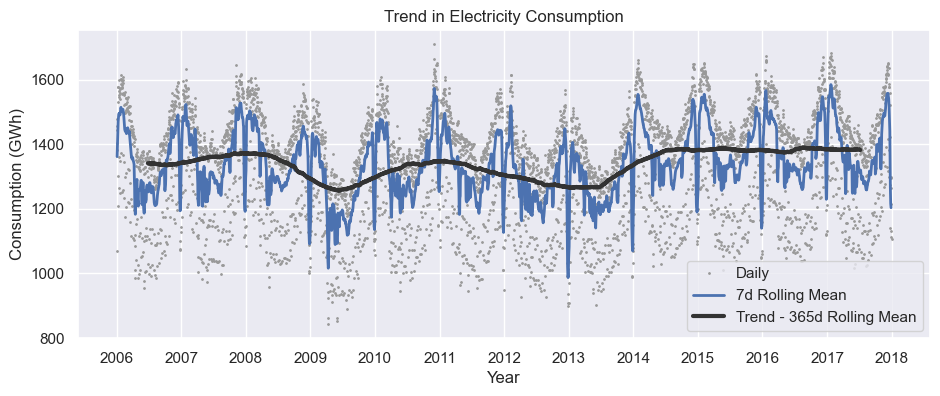

In [47]:
# Plot daily , 7-day rolling mean , and 365 - day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily["Consumption"], marker = ".", markersize = 2, color = "0.6", linestyle = "None", label = "Daily")
ax.plot(opsd_7d["Consumption"], linewidth = 2, label = "7d Rolling Mean")
ax.plot(opsd_365d["Consumption"], color = "0.2", linewidth = 3, label = "Trend - 365d Rolling Mean")
# Set x- ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Trend in Electricity Consumption")
plt.show()

Electricity consumption trends, weekly and yearly, increased sharply at the end of the year

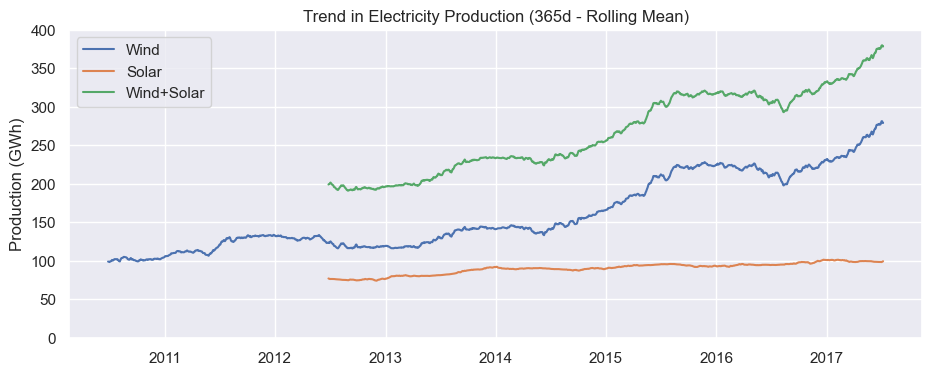

In [48]:
# Plot 365 - day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for name in ["Wind", "Solar", "Wind+Solar"]:
    ax.plot(opsd_365d[name], label = name)
    # Set x- ticks to yearly interval , adjust y- axis limits , add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0,400)
    ax.legend()
    ax.set_ylabel("Production (GWh)")
    ax.set_title("Trend in Electricity Production (365d - Rolling Mean)")
plt.show()

The trend of wind and solar power generation tends to increase every year, especially wind power

So with some of the above steps, we have seen how to organize, analyze and visualize
time series data in pandas, using techniques such as time-based indexing, resampling,
rolling windows. Applying this technique to the OPSD dataset, we get detailed information about
time, periods, and trends in electricity production and consumption.